# Generate some simulated data

In [1]:
gen_data = function(N,P,s=1/10){
    X = array(rnorm(N*P),c(N,P))
    beta = array(rnorm(P+1),c(P+1,1))
    epsilon = array(rnorm(N,sd=s),c(N,1))
    y = cbind(1,X)%*%beta + epsilon
    return(list(
        X=X,beta=beta,epsilon=epsilon,y=y
        )
    )
}

In [2]:
d = gen_data(100,1)

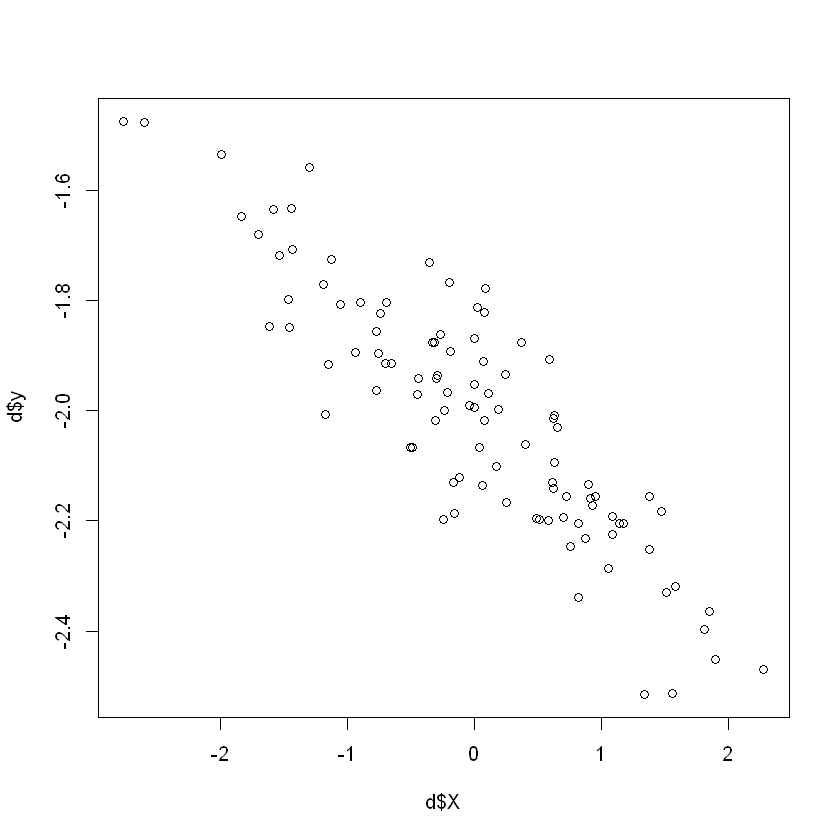

In [11]:
plot(d$X,d$y)

In [3]:
head(d$X)

0.8215691
0.8205578
0.1077850
-0.1938196
-0.2391866
-0.8953086


In [4]:
head(d$beta)

-2.0142300
-0.1941409


In [5]:
head(d$y)

-2.339384
-2.205414
-1.968882
-1.768323
-2.000104
-1.804218


In [6]:
names(d)

[1] "X"       "beta"    "epsilon" "y"

# Fitting in `R` using `lm`

In [7]:
mod = lm(d$y~d$X)

In [8]:
summary(mod)


Call:
lm(formula = d$y ~ d$X)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.247125 -0.061719  0.002908  0.060893  0.247895 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.00814    0.01054 -190.49   <2e-16 ***
d$X         -0.19436    0.01034  -18.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1054 on 98 degrees of freedom
Multiple R-squared:  0.7827,	Adjusted R-squared:  0.7805 
F-statistic:   353 on 1 and 98 DF,  p-value: < 2.2e-16


In [9]:
mod$coef

(Intercept)         d$X 
 -2.0081381  -0.1943561

In [12]:
head(predict(mod))

1         2         3         4         5         6 
-2.167815 -2.167619 -2.029087 -1.970468 -1.961651 -1.834129

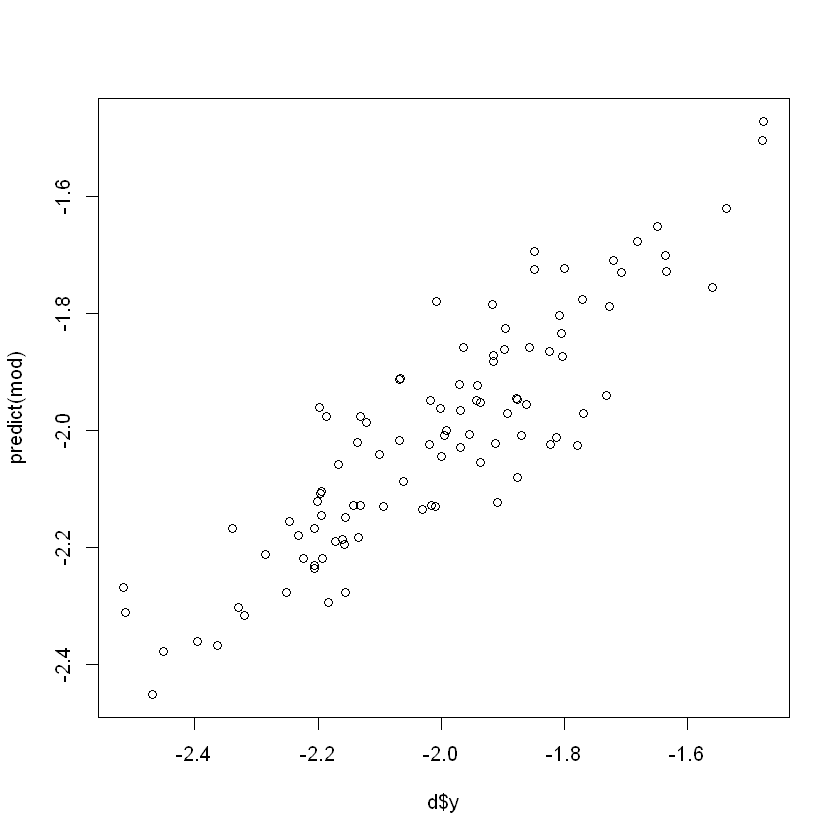

In [13]:
plot(d$y,predict(mod))

# Calculating by hand

In [14]:
D = cbind(1,d$X)
head(D)

1,0.8215691
1,0.8205578
1,0.1077850
1,-0.1938196
1,-0.2391866
1,-0.8953086


In [15]:
beta_hat = solve(t(D)%*%D)%*%t(D)%*%d$y

In [16]:
beta_hat

-2.0081381
-0.1943561


In [17]:
coef(mod)

(Intercept)         d$X 
 -2.0081381  -0.1943561

# Plotting the loss

In [18]:
L = function(beta){
    sum((d$y-cbind(1,d$X)%*%beta)^2)
}

In [19]:
beta_grid = expand.grid(beta0=seq(-3,3,by=.1),beta1=seq(-3,3,by=.1))

In [20]:
head(beta_grid)

,beta0,beta1
,<dbl>,<dbl>
1,-3.0,-3
2,-2.9,-3
3,-2.8,-3
4,-2.7,-3
5,-2.6,-3
6,-2.5,-3


In [22]:
library('ggplot2')

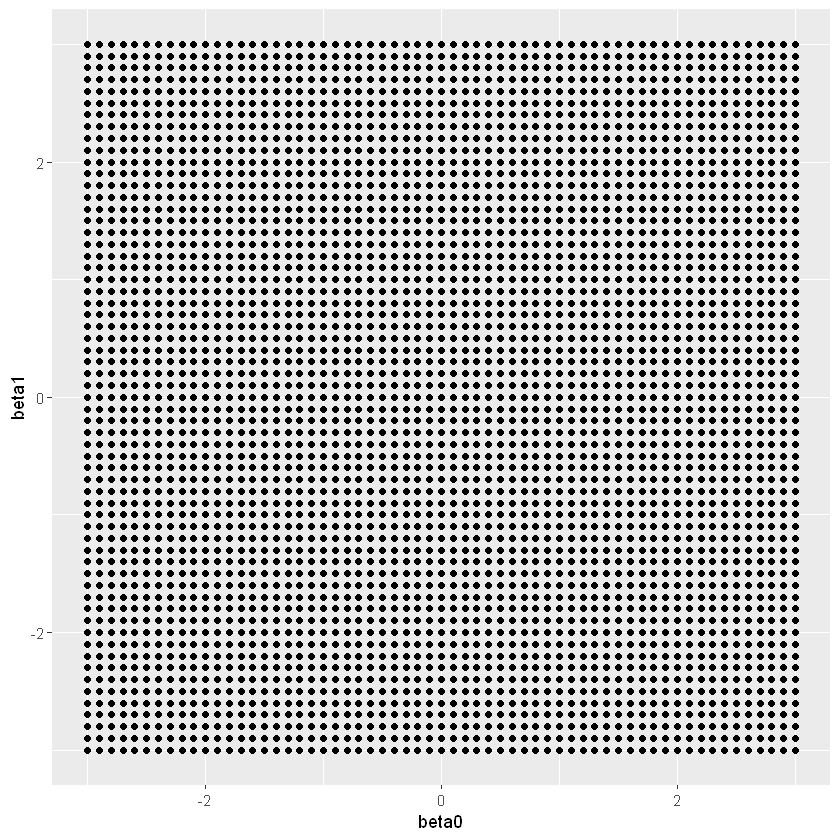

In [24]:
ggplot(data=beta_grid,mapping=aes(x=beta0,y=beta1))+geom_point()

In [25]:
beta_grid$L = apply(beta_grid,1,L)

In [26]:
head(beta_grid)

,beta0,beta1,L
,<dbl>,<dbl>,<dbl>
1,-3.0,-3,912.3078
2,-2.9,-3,893.9455
3,-2.8,-3,877.5832
4,-2.7,-3,863.2209
5,-2.6,-3,850.8586
6,-2.5,-3,840.4963


In [27]:
library('ggplot2')
library('viridis')

Warning message:
"package 'viridis' was built under R version 4.0.5"
Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.0.5"


In [28]:
beta_hat_df = data.frame(beta0=beta_hat[1],beta1=beta_hat[2])

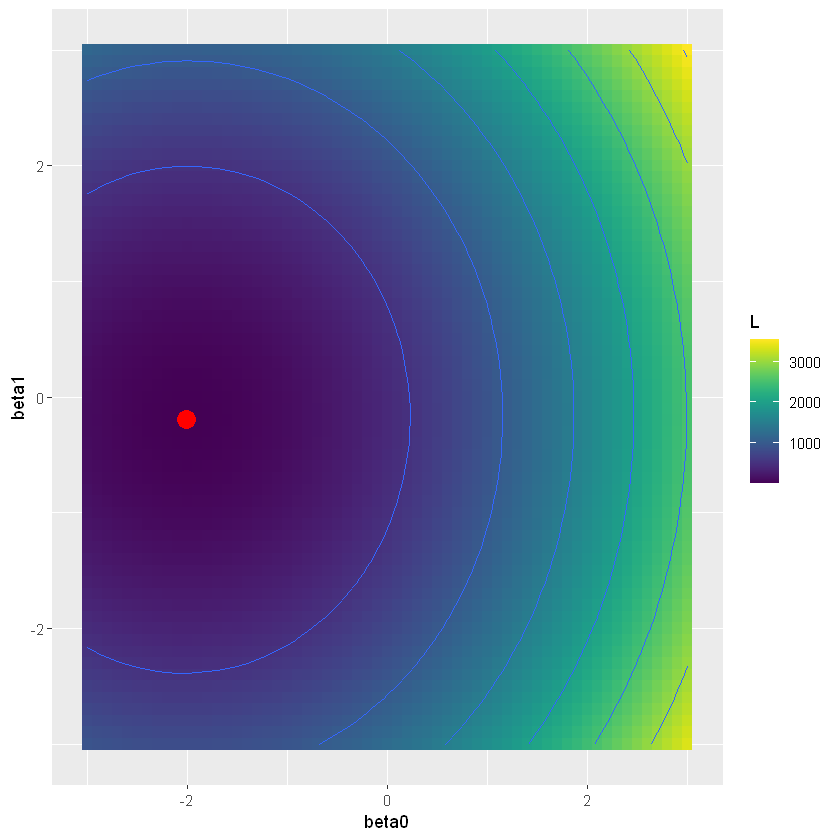

In [29]:
ggplot(data=beta_grid,mapping=aes(x=beta0,y=beta1,fill=L,z=L))+geom_tile()+
    scale_fill_viridis()+geom_contour()+
    geom_point(data=beta_hat_df,mapping=aes(x=beta0,y=beta1),inherit.aes=FALSE,color='red',size=5)

# Categorial variables

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/800px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg" width="200" height="500">

In [ ]:
#install.packages("palmerpenguins")

In [30]:
library('palmerpenguins')

In [31]:
penguins = penguins[complete.cases(penguins),]

In [32]:
head(penguins[sample(nrow(penguins)),])

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,51.5,16.3,230,5500,male,2009
Gentoo,Biscoe,41.7,14.7,210,4700,female,2009
Adelie,Dream,40.8,18.4,195,3900,male,2007
Gentoo,Biscoe,45.1,14.5,207,5050,female,2007
Adelie,Dream,40.2,20.1,200,3975,male,2009
Gentoo,Biscoe,47.5,14.0,212,4875,female,2009


In [33]:
mod = lm(flipper_length_mm~bill_length_mm+species,data=penguins)

In [35]:
summary(penguins)

      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :146   Biscoe   :163   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :123   1st Qu.:39.50   1st Qu.:15.60  
 Gentoo   :119   Torgersen: 47   Median :44.50   Median :17.30  
                                 Mean   :43.99   Mean   :17.16  
                                 3rd Qu.:48.60   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172       Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190       1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197       Median :4050                Median :2008  
 Mean   :201       Mean   :4207                Mean   :2008  
 3rd Qu.:213       3rd Qu.:4775                3rd Qu.:2009  
 Max.   :231       Max.   :6300                Max.   :2009  

In [34]:
summary(mod)


Call:
lm(formula = flipper_length_mm ~ bill_length_mm + species, data = penguins)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.8669  -3.4617  -0.0765   3.7020  15.9944 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      147.5633     4.2234  34.940  < 2e-16 ***
bill_length_mm     1.0957     0.1081  10.139  < 2e-16 ***
speciesChinstrap  -5.2470     1.3797  -3.803  0.00017 ***
speciesGentoo     17.5517     1.1883  14.771  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.833 on 329 degrees of freedom
Multiple R-squared:  0.8283,	Adjusted R-squared:  0.8268 
F-statistic: 529.2 on 3 and 329 DF,  p-value: < 2.2e-16


In [36]:
D = model.matrix(~bill_length_mm+species,data=penguins)
head(D[sample(nrow(D)),])

,(Intercept),bill_length_mm,speciesChinstrap,speciesGentoo
101,1,38.6,0,0
173,1,47.8,0,1
41,1,39.6,0,0
30,1,36.4,0,0
288,1,43.2,1,0
308,1,50.9,1,0


In [39]:
y = penguins$flipper_length_mm
y = array(y,c(length(y),1))
head(y)

181
186
195
193
190
181


In [40]:
beta_hat = solve(t(D)%*%D)%*%t(D)%*%y

In [41]:
beta_hat

(Intercept),147.563315
bill_length_mm,1.095700
speciesChinstrap,-5.247004
speciesGentoo,17.551650


In [42]:
coef(mod)

(Intercept)   bill_length_mm speciesChinstrap    speciesGentoo 
      147.563315         1.095700        -5.247004        17.551650

# Fitting Issues

In [43]:
d = gen_data(100,200)

In [44]:
dim(d$X)

[1] 100 200

In [45]:
mod = lm(d$y~d$X)
summary(mod)


Call:
lm(formula = d$y ~ d$X)

Residuals:
ALL 100 residuals are 0: no residual degrees of freedom!

Coefficients: (101 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   24.1493         NA      NA       NA
d$X1         -59.4423         NA      NA       NA
d$X2         -65.6052         NA      NA       NA
d$X3          28.0193         NA      NA       NA
d$X4        -106.7662         NA      NA       NA
d$X5         -53.4637         NA      NA       NA
d$X6         -56.7412         NA      NA       NA
d$X7         149.8544         NA      NA       NA
d$X8          61.5609         NA      NA       NA
d$X9          40.3262         NA      NA       NA
d$X10        -22.9564         NA      NA       NA
d$X11        -10.4198         NA      NA       NA
d$X12        -70.4882         NA      NA       NA
d$X13          0.5308         NA      NA       NA
d$X14        -59.9071         NA      NA       NA
d$X15        -32.5773         NA      NA  

In [48]:
tail(coef(mod))

d$X195 d$X196 d$X197 d$X198 d$X199 d$X200 
    NA     NA     NA     NA     NA     NA

In [49]:
D = model.matrix(mod)
D[1:5,1:5]

,(Intercept),d$X1,d$X2,d$X3,d$X4
1,1,-0.4419551,1.2485607,0.02024202,-1.5895637
2,1,0.5571218,-1.4213542,0.36756942,0.9998642
3,1,0.4712390,0.8099290,0.98271007,-1.0610416
4,1,1.6322126,-0.4924717,0.28202648,-0.4242250
5,1,0.6771151,1.3558162,-0.09156307,-0.4491900


In [50]:
solve(t(D)%*%D)%*%t(D)%*%d$y

ERROR: Error in solve.default(t(D) %*% D): system is computationally singular: reciprocal condition number = 1.26258e-19


another example

In [52]:
xx = rnorm(100)
X = cbind(xx,xx)
colnames(X) = c('V1','V2')
head(X)

V1,V2
-0.7638261,-0.7638261
0.9739199,0.9739199
-0.2240167,-0.2240167
0.1846518,0.1846518
0.1288847,0.1288847
-0.6221506,-0.6221506


In [53]:
true_beta = array(c(3,5),c(2,1))
true_beta

3
5


In [54]:
y = X %*% true_beta + rnorm(100,sd=1/10)

In [55]:
mod = lm(y~X)
summary(mod)


Call:
lm(formula = y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35018 -0.06364 -0.00011  0.06262  0.27811 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01083    0.01026  -1.056    0.294    
XV1          7.99970    0.01061 753.815   <2e-16 ***
XV2               NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1024 on 98 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 5.682e+05 on 1 and 98 DF,  p-value: < 2.2e-16


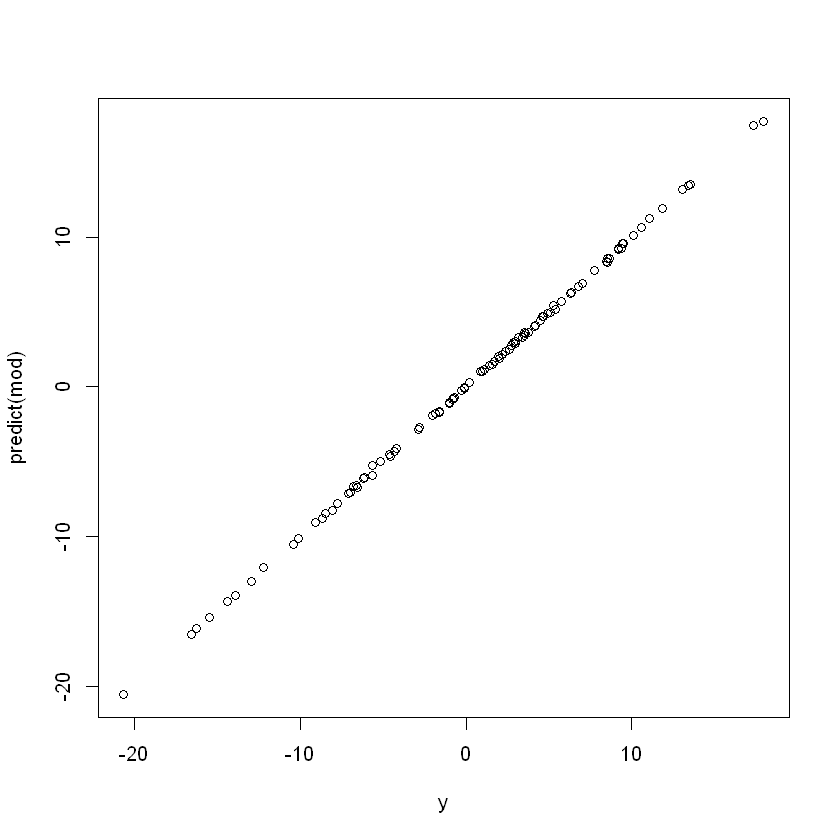

In [56]:
plot(y,predict(mod))

In [57]:
D = cbind(1,X)
beta_hat = solve(t(D)%*%D)%*%t(D)%*%y

ERROR: Error in solve.default(t(D) %*% D): Lapack routine dgesv: system is exactly singular: U[3,3] = 0


what does the loss look like?

In [58]:
L = function(beta){
    sum((y-X%*%beta)^2)
}
beta_grid = expand.grid(beta1=seq(-5,10,by=.1),beta2=seq(-5,10,by=.1))
beta_grid$L = apply(beta_grid,1,L)

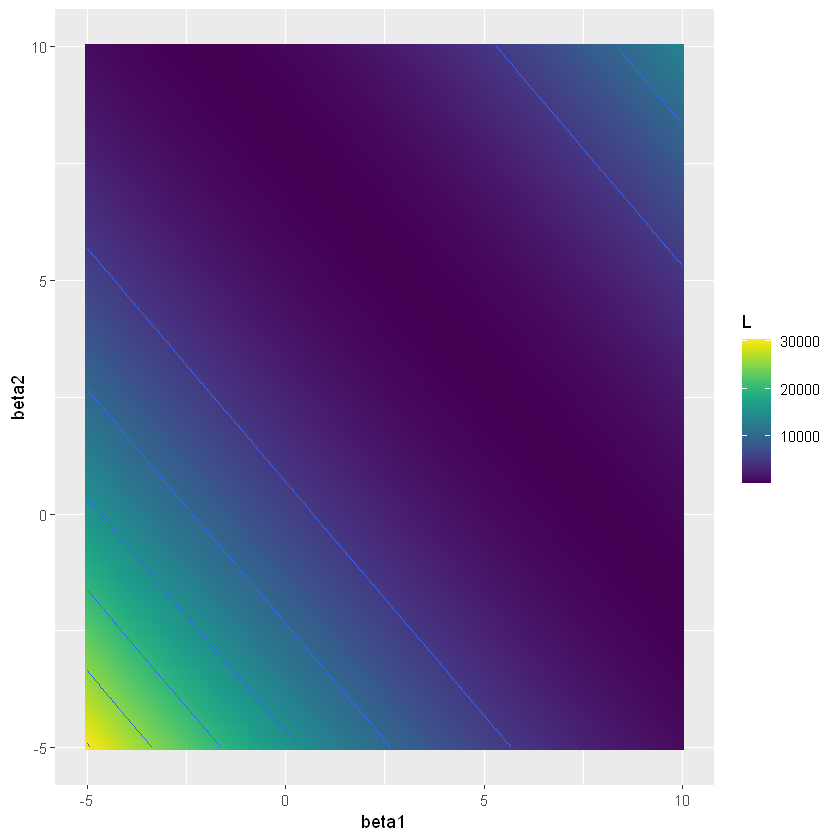

In [59]:
ggplot(data=beta_grid,mapping=aes(x=beta1,y=beta2,fill=L,z=L))+geom_tile()+
    scale_fill_viridis()+geom_contour()

# polynomial regression

In [61]:
N = 100 
P = 1
X = array(rnorm(N*P),c(N,P))

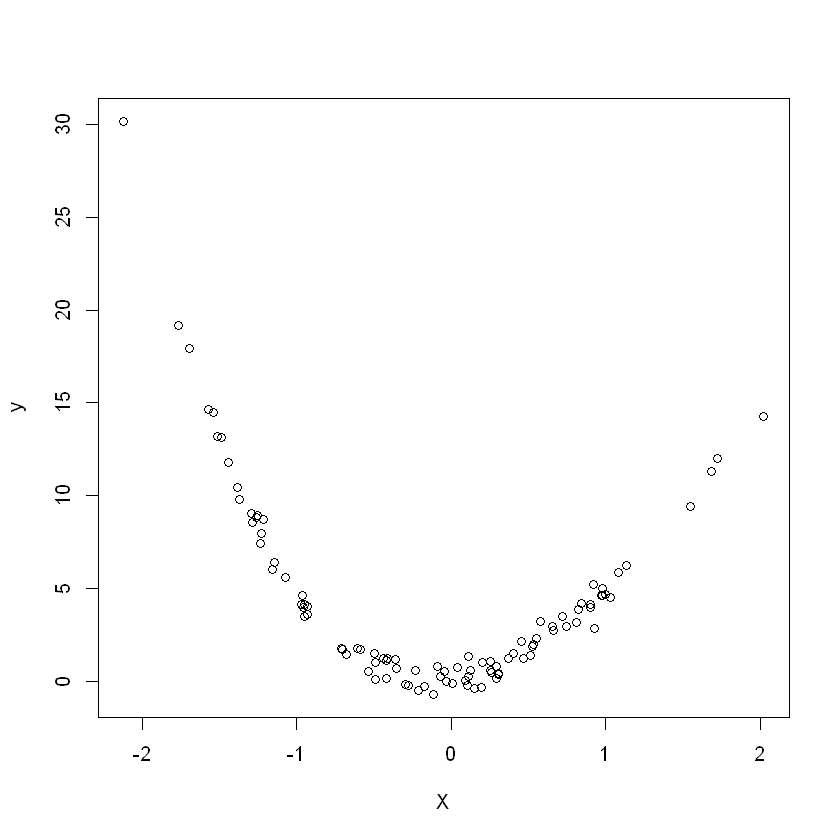

In [68]:
y = X + 5*X^2 - X^3 + rnorm(100,0,.5)
plot(X,y)

In [78]:
D = cbind(1,X,X^2,X^3)
head(D)

1,0.3704776,0.13725367,0.05084941
1,-0.2290636,0.05247012,-0.01201899
1,-0.4102932,0.16834049,-0.06906895
1,0.9015095,0.81271931,0.73267414
1,1.6880153,2.84939565,4.80982346
1,0.6641557,0.44110281,0.29296096


In [79]:
beta_hat = solve(t(D)%*%D)%*%t(D)%*%y

In [80]:
beta_hat

-0.001319342
1.159417545
4.983480691
-1.055951487


In [81]:
xp = seq(-2,2,length.out=100)

In [82]:
Dp = cbind(1,xp,xp^2,xp^3)

In [83]:
y_pred = Dp%*%beta_hat

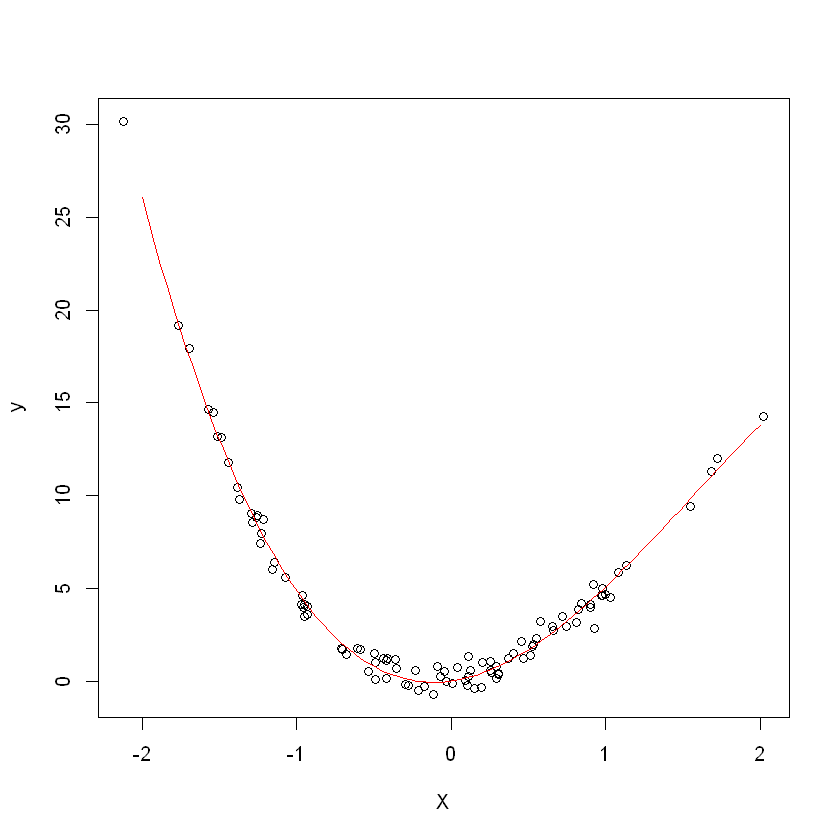

In [84]:
plot(X,y)
lines(xp,y_pred,col='red')